In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [11]:
df_test = pd.read_csv("./test.csv")
df_train = pd.read_csv("./train.csv")
df_sub = pd.read_csv("./sample_submission.csv")

y = df_train['SalePrice']

concat = pd.concat([df_test, df_train])

concat = concat.drop(['Id','Street','Alley','Utilities','Condition2','RoofMatl','Heating','CentralAir','Electrical','LowQualFinSF','KitchenAbvGr','PoolArea','PoolQC','MiscVal'],axis=1)
concat.loc[concat['MSSubClass'] == "150", "MSSubClass"] = "160"
# ------------MSZoning----------------
concat.loc[concat['MSZoning'] == "A", "MSZoning"] = "1"
concat.loc[concat['MSZoning'] == "C", "MSZoning"] = "2"
concat.loc[concat['MSZoning'] == "FV", "MSZoning"] = "3"
concat.loc[concat['MSZoning'] == "I", "MSZoning"] = "4"
concat.loc[concat['MSZoning'] == "RH", "MSZoning"] = "5"
concat.loc[concat['MSZoning'] == "RL", "MSZoning"] = "6"
concat.loc[concat['MSZoning'] == "RP", "MSZoning"] = "7"
concat.loc[concat['MSZoning'] == "RM", "MSZoning"] = "8"
concat.loc[concat['MSZoning'] == "C (all)", "MSZoning"] = "9"

# ------------LotShape----------------
concat.loc[concat['LotShape'] == "Reg", "LotShape"] = "1"
concat.loc[concat['LotShape'] == "IR1", "LotShape"] = "2"
concat.loc[concat['LotShape'] == "IR2", "LotShape"] = "3"
concat.loc[concat['LotShape'] == "IR3", "LotShape"] = "4"

# ------------LandContour----------------
concat.loc[concat['LandContour'] == "Lvl", "LandContour"] = "1"
concat.loc[concat['LandContour'] == "Bnk", "LandContour"] = "2"
concat.loc[concat['LandContour'] == "HLS", "LandContour"] = "3"
concat.loc[concat['LandContour'] == "Low", "LandContour"] = "4"

# ------------LotConfig----------------
concat.loc[concat['LotConfig'] == "Inside", "LotConfig"] = "1"
concat.loc[concat['LotConfig'] == "Corner", "LotConfig"] = "2"
concat.loc[concat['LotConfig'] == "CulDSac", "LotConfig"] = "3"
concat.loc[concat['LotConfig'] == "FR2", "LotConfig"] = "4"
concat.loc[concat['LotConfig'] == "FR3", "LotConfig"] = "5"

# ------------LandSlope----------------
concat.loc[concat['LandSlope'] == "Gtl", "LandSlope"] = "1"
concat.loc[concat['LandSlope'] == "Mod", "LandSlope"] = "2"
concat.loc[concat['LandSlope'] == "Sev", "LandSlope"] = "3"

# ------------Neighborhood----------------
concat.loc[concat['Neighborhood'] == "Blmngtn", "Neighborhood"] = "1"
concat.loc[concat['Neighborhood'] == "Blueste", "Neighborhood"] = "2"
concat.loc[concat['Neighborhood'] == "BrDale", "Neighborhood"] = "3"
concat.loc[concat['Neighborhood'] == "BrkSide", "Neighborhood"] = "4"
concat.loc[concat['Neighborhood'] == "ClearCr", "Neighborhood"] = "5"
concat.loc[concat['Neighborhood'] == "CollgCr", "Neighborhood"] = "6"
concat.loc[concat['Neighborhood'] == "Crawfor", "Neighborhood"] = "7"
concat.loc[concat['Neighborhood'] == "Edwards", "Neighborhood"] = "8"
concat.loc[concat['Neighborhood'] == "Gilbert", "Neighborhood"] = "9"
concat.loc[concat['Neighborhood'] == "IDOTRR", "Neighborhood"] = "10"
concat.loc[concat['Neighborhood'] == "MeadowV", "Neighborhood"] = "11"
concat.loc[concat['Neighborhood'] == "Mitchel", "Neighborhood"] = "12"
concat.loc[concat['Neighborhood'] == "NAmes", "Neighborhood"] = "13"
concat.loc[concat['Neighborhood'] == "NoRidge", "Neighborhood"] = "14"
concat.loc[concat['Neighborhood'] == "NPkVill", "Neighborhood"] = "15"
concat.loc[concat['Neighborhood'] == "NridgHt", "Neighborhood"] = "16"
concat.loc[concat['Neighborhood'] == "NWAmes", "Neighborhood"] = "17"
concat.loc[concat['Neighborhood'] == "OldTown", "Neighborhood"] = "18"
concat.loc[concat['Neighborhood'] == "SWISU", "Neighborhood"] = "19"
concat.loc[concat['Neighborhood'] == "Sawyer", "Neighborhood"] = "20"
concat.loc[concat['Neighborhood'] == "SawyerW", "Neighborhood"] = "21"
concat.loc[concat['Neighborhood'] == "Somerst", "Neighborhood"] = "22"
concat.loc[concat['Neighborhood'] == "StoneBr", "Neighborhood"] = "23"
concat.loc[concat['Neighborhood'] == "Timber", "Neighborhood"] = "24"
concat.loc[concat['Neighborhood'] == "Veenker", "Neighborhood"] = "25"

# ------------Condition1----------------
concat.loc[concat['Condition1'] == "Artery", "Condition1"] = "1"
concat.loc[concat['Condition1'] == "Feedr", "Condition1"] = "2"
concat.loc[concat['Condition1'] == "Norm", "Condition1"] = "3"
concat.loc[concat['Condition1'] == "RRNn", "Condition1"] = "4"
concat.loc[concat['Condition1'] == "RRAn", "Condition1"] = "5"
concat.loc[concat['Condition1'] == "PosN", "Condition1"] = "6"
concat.loc[concat['Condition1'] == "PosA", "Condition1"] = "7"
concat.loc[concat['Condition1'] == "RRNe", "Condition1"] = "8"
concat.loc[concat['Condition1'] == "RRAe", "Condition1"] = "9"

# ------------BldgType----------------
concat.loc[concat['BldgType'] == "1Fam", "BldgType"] = "1"
concat.loc[concat['BldgType'] == "2fmCon", "BldgType"] = "2"
concat.loc[concat['BldgType'] == "Duplex", "BldgType"] = "3"
concat.loc[concat['BldgType'] == "TwnhsE", "BldgType"] = "4"
concat.loc[concat['BldgType'] == "Twnhs", "BldgType"] = "5"

# ------------HouseStyle----------------
concat.loc[concat['HouseStyle'] == "1Story", "HouseStyle"] = "1"
concat.loc[concat['HouseStyle'] == "1.5Fin", "HouseStyle"] = "2"
concat.loc[concat['HouseStyle'] == "1.5Unf", "HouseStyle"] = "2"
concat.loc[concat['HouseStyle'] == "2Story", "HouseStyle"] = "3"
concat.loc[concat['HouseStyle'] == "2.5Fin", "HouseStyle"] = "4"
concat.loc[concat['HouseStyle'] == "2.5Unf", "HouseStyle"] = "4"
concat.loc[concat['HouseStyle'] == "SFoyer", "HouseStyle"] = "5"
concat.loc[concat['HouseStyle'] == "SLvl", "HouseStyle"] = "6"

# ------------RoofStyle----------------
concat.loc[concat['RoofStyle'] == "Flat", "RoofStyle"] = "1"
concat.loc[concat['RoofStyle'] == "Gable", "RoofStyle"] = "2"
concat.loc[concat['RoofStyle'] == "Gambrel", "RoofStyle"] = "3"
concat.loc[concat['RoofStyle'] == "Hip", "RoofStyle"] = "4"
concat.loc[concat['RoofStyle'] == "Mansard", "RoofStyle"] = "5"
concat.loc[concat['RoofStyle'] == "Shed", "RoofStyle"] = "6"

# ------------Exterior1st----------------
concat.loc[concat['Exterior1st'] == "AsbShng", "Exterior1st"] = "1"
concat.loc[concat['Exterior1st'] == "AsphShn", "Exterior1st"] = "2"
concat.loc[concat['Exterior1st'] == "BrkComm", "Exterior1st"] = "3"
concat.loc[concat['Exterior1st'] == "BrkFace", "Exterior1st"] = "4"
concat.loc[concat['Exterior1st'] == "CBlock", "Exterior1st"] = "5"
concat.loc[concat['Exterior1st'] == "CemntBd", "Exterior1st"] = "6"
concat.loc[concat['Exterior1st'] == "HdBoard", "Exterior1st"] = "7"
concat.loc[concat['Exterior1st'] == "ImStucc", "Exterior1st"] = "8"
concat.loc[concat['Exterior1st'] == "MetalSd", "Exterior1st"] = "9"
concat.loc[concat['Exterior1st'] == "Other", "Exterior1st"] = "10"
concat.loc[concat['Exterior1st'] == "Plywood", "Exterior1st"] = "11"
concat.loc[concat['Exterior1st'] == "PreCast", "Exterior1st"] = "12"
concat.loc[concat['Exterior1st'] == "Stone", "Exterior1st"] = "13"
concat.loc[concat['Exterior1st'] == "Stucco", "Exterior1st"] = "14"
concat.loc[concat['Exterior1st'] == "VinylSd", "Exterior1st"] = "15"
concat.loc[concat['Exterior1st'] == "Wd Sdng", "Exterior1st"] = "16"
concat.loc[concat['Exterior1st'] == "WdShing", "Exterior1st"] = "17"

# ------------Exterior2nd----------------
concat.loc[concat['Exterior2nd'] == "AsbShng", "Exterior2nd"] = "1"
concat.loc[concat['Exterior2nd'] == "AsphShn", "Exterior2nd"] = "2"
concat.loc[concat['Exterior2nd'] == "BrkComm", "Exterior2nd"] = "3"
concat.loc[concat['Exterior2nd'] == "Brk Cmn", "Exterior2nd"] = "3"
concat.loc[concat['Exterior2nd'] == "BrkFace", "Exterior2nd"] = "4"
concat.loc[concat['Exterior2nd'] == "CBlock", "Exterior2nd"] = "5"
concat.loc[concat['Exterior2nd'] == "CemntBd", "Exterior2nd"] = "6"
concat.loc[concat['Exterior2nd'] == "CmentBd", "Exterior2nd"] = "6"
concat.loc[concat['Exterior2nd'] == "HdBoard", "Exterior2nd"] = "7"
concat.loc[concat['Exterior2nd'] == "ImStucc", "Exterior2nd"] = "8"
concat.loc[concat['Exterior2nd'] == "MetalSd", "Exterior2nd"] = "9"
concat.loc[concat['Exterior2nd'] == "Other", "Exterior2nd"] = "10"
concat.loc[concat['Exterior2nd'] == "Plywood", "Exterior2nd"] = "11"
concat.loc[concat['Exterior2nd'] == "PreCast", "Exterior2nd"] = "12"
concat.loc[concat['Exterior2nd'] == "Stone", "Exterior2nd"] = "13"
concat.loc[concat['Exterior2nd'] == "Stucco", "Exterior2nd"] = "14"
concat.loc[concat['Exterior2nd'] == "VinylSd", "Exterior2nd"] = "15"
concat.loc[concat['Exterior2nd'] == "Wd Sdng", "Exterior2nd"] = "16"
concat.loc[concat['Exterior2nd'] == "Wd Shng", "Exterior2nd"] = "16"
concat.loc[concat['Exterior2nd'] == "WdShing", "Exterior2nd"] = "17"

# ------------MasVnrType----------------
concat.loc[concat['MasVnrType'] == "BrkCmn", "MasVnrType"] = "1"
concat.loc[concat['MasVnrType'] == "BrkFace", "MasVnrType"] = "2"
concat.loc[concat['MasVnrType'] == "CBlock", "MasVnrType"] = "3"
concat.loc[concat['MasVnrType'] == "None", "MasVnrType"] = "4"
concat.loc[concat['MasVnrType'] == "Stone", "MasVnrType"] = "5"

# ------------ExterQual----------------
concat.loc[concat['ExterQual'] == "Ex", "ExterQual"] = "1"
concat.loc[concat['ExterQual'] == "Gd", "ExterQual"] = "2"
concat.loc[concat['ExterQual'] == "TA", "ExterQual"] = "3"
concat.loc[concat['ExterQual'] == "Fa", "ExterQual"] = "4"
concat.loc[concat['ExterQual'] == "Po", "ExterQual"] = "5"

# ------------ExterCond----------------
concat.loc[concat['ExterCond'] == "Ex", "ExterCond"] = "1"
concat.loc[concat['ExterCond'] == "Gd", "ExterCond"] = "2"
concat.loc[concat['ExterCond'] == "TA", "ExterCond"] = "3"
concat.loc[concat['ExterCond'] == "Fa", "ExterCond"] = "4"
concat.loc[concat['ExterCond'] == "Po", "ExterCond"] = "5"

# ------------Foundation----------------
concat.loc[concat['Foundation'] == "BrkTil", "Foundation"] = "1"
concat.loc[concat['Foundation'] == "CBlock", "Foundation"] = "2"
concat.loc[concat['Foundation'] == "PConc", "Foundation"] = "3"
concat.loc[concat['Foundation'] == "Slab", "Foundation"] = "4"
concat.loc[concat['Foundation'] == "Stone", "Foundation"] = "5"
concat.loc[concat['Foundation'] == "Wood", "Foundation"] = "6"

# ------------BsmtQual----------------
concat.loc[concat['BsmtQual'] == "Ex", "BsmtQual"] = "1"
concat.loc[concat['BsmtQual'] == "Gd", "BsmtQual"] = "2"
concat.loc[concat['BsmtQual'] == "TA", "BsmtQual"] = "3"
concat.loc[concat['BsmtQual'] == "Fa", "BsmtQual"] = "4"
concat.loc[concat['BsmtQual'] == "Po", "BsmtQual"] = "5"

# ------------BsmtCond----------------
concat.loc[concat['BsmtCond'] == "Ex", "BsmtCond"] = "1"
concat.loc[concat['BsmtCond'] == "Gd", "BsmtCond"] = "2"
concat.loc[concat['BsmtCond'] == "TA", "BsmtCond"] = "3"
concat.loc[concat['BsmtCond'] == "Fa", "BsmtCond"] = "4"
concat.loc[concat['BsmtCond'] == "Po", "BsmtCond"] = "5"

# ------------BsmtExposure----------------
concat.loc[concat['BsmtExposure'] == "Gd", "BsmtExposure"] = "1"
concat.loc[concat['BsmtExposure'] == "Av", "BsmtExposure"] = "2"
concat.loc[concat['BsmtExposure'] == "Mn", "BsmtExposure"] = "3"
concat.loc[concat['BsmtExposure'] == "No", "BsmtExposure"] = "4"

# ------------BsmtFinType1----------------
concat.loc[concat['BsmtFinType1'] == "GLQ", "BsmtFinType1"] = "1"
concat.loc[concat['BsmtFinType1'] == "ALQ", "BsmtFinType1"] = "2"
concat.loc[concat['BsmtFinType1'] == "BLQ", "BsmtFinType1"] = "3"
concat.loc[concat['BsmtFinType1'] == "Rec", "BsmtFinType1"] = "4"
concat.loc[concat['BsmtFinType1'] == "LwQ", "BsmtFinType1"] = "5"
concat.loc[concat['BsmtFinType1'] == "Unf", "BsmtFinType1"] = "6"

# ------------BsmtFinType2----------------
concat.loc[concat['BsmtFinType2'] == "GLQ", "BsmtFinType2"] = "1"
concat.loc[concat['BsmtFinType2'] == "ALQ", "BsmtFinType2"] = "2"
concat.loc[concat['BsmtFinType2'] == "BLQ", "BsmtFinType2"] = "3"
concat.loc[concat['BsmtFinType2'] == "Rec", "BsmtFinType2"] = "4"
concat.loc[concat['BsmtFinType2'] == "LwQ", "BsmtFinType2"] = "5"
concat.loc[concat['BsmtFinType2'] == "Unf", "BsmtFinType2"] = "6"

# ------------HeatingQC----------------
concat.loc[concat['HeatingQC'] == "Ex", "HeatingQC"] = "1"
concat.loc[concat['HeatingQC'] == "Gd", "HeatingQC"] = "2"
concat.loc[concat['HeatingQC'] == "TA", "HeatingQC"] = "3"
concat.loc[concat['HeatingQC'] == "Fa", "HeatingQC"] = "4"
concat.loc[concat['HeatingQC'] == "Po", "HeatingQC"] = "5"

# ------------KitchenQual----------------
concat.loc[concat['KitchenQual'] == "Ex", "KitchenQual"] = "1"
concat.loc[concat['KitchenQual'] == "Gd", "KitchenQual"] = "2"
concat.loc[concat['KitchenQual'] == "TA", "KitchenQual"] = "3"
concat.loc[concat['KitchenQual'] == "Fa", "KitchenQual"] = "4"
concat.loc[concat['KitchenQual'] == "Po", "KitchenQual"] = "5"

# ------------Functional----------------
concat.loc[concat['Functional'] == "Typ", "Functional"] = "1"
concat.loc[concat['Functional'] == "Min1", "Functional"] = "2"
concat.loc[concat['Functional'] == "Min2", "Functional"] = "3"
concat.loc[concat['Functional'] == "Mod", "Functional"] = "4"
concat.loc[concat['Functional'] == "Maj1", "Functional"] = "5"
concat.loc[concat['Functional'] == "Maj2", "Functional"] = "6"
concat.loc[concat['Functional'] == "Sev", "Functional"] = "7"
concat.loc[concat['Functional'] == "Sal", "Functional"] = "8"

# ------------FireplaceQu----------------
concat.loc[concat['FireplaceQu'] == "Ex", "FireplaceQu"] = "1"
concat.loc[concat['FireplaceQu'] == "Gd", "FireplaceQu"] = "2"
concat.loc[concat['FireplaceQu'] == "TA", "FireplaceQu"] = "3"
concat.loc[concat['FireplaceQu'] == "Fa", "FireplaceQu"] = "4"
concat.loc[concat['FireplaceQu'] == "Po", "FireplaceQu"] = "5"

# ------------GarageType----------------
concat.loc[concat['GarageType'] == "2Types", "GarageType"] = "1"
concat.loc[concat['GarageType'] == "Attchd", "GarageType"] = "2"
concat.loc[concat['GarageType'] == "Basment", "GarageType"] = "3"
concat.loc[concat['GarageType'] == "BuiltIn", "GarageType"] = "4"
concat.loc[concat['GarageType'] == "CarPort", "GarageType"] = "5"
concat.loc[concat['GarageType'] == "Detchd", "GarageType"] = "6"

# ------------GarageFinish----------------
concat.loc[concat['GarageFinish'] == "Fin", "GarageFinish"] = "1"
concat.loc[concat['GarageFinish'] == "RFn", "GarageFinish"] = "2"
concat.loc[concat['GarageFinish'] == "Unf", "GarageFinish"] = "3"

# ------------GarageQual----------------
concat.loc[concat['GarageQual'] == "Ex", "GarageQual"] = "1"
concat.loc[concat['GarageQual'] == "Gd", "GarageQual"] = "2"
concat.loc[concat['GarageQual'] == "TA", "GarageQual"] = "3"
concat.loc[concat['GarageQual'] == "Fa", "GarageQual"] = "4"
concat.loc[concat['GarageQual'] == "Po", "GarageQual"] = "5"

# ------------GarageCond----------------
concat.loc[concat['GarageCond'] == "Ex", "GarageCond"] = "1"
concat.loc[concat['GarageCond'] == "Gd", "GarageCond"] = "2"
concat.loc[concat['GarageCond'] == "TA", "GarageCond"] = "3"
concat.loc[concat['GarageCond'] == "Fa", "GarageCond"] = "4"
concat.loc[concat['GarageCond'] == "Po", "GarageCond"] = "5"

# ------------PavedDrive----------------
concat.loc[concat['PavedDrive'] == "Y", "PavedDrive"] = "1"
concat.loc[concat['PavedDrive'] == "P", "PavedDrive"] = "2"
concat.loc[concat['PavedDrive'] == "N", "PavedDrive"] = "3"

# ------------Fence----------------
concat.loc[concat['Fence'] == "GdPrv", "Fence"] = "1"
concat.loc[concat['Fence'] == "MnPrv", "Fence"] = "2"
concat.loc[concat['Fence'] == "GdWo", "Fence"] = "3"
concat.loc[concat['Fence'] == "MnWw", "Fence"] = "4"

# ------------MiscFeature----------------
concat.loc[concat['MiscFeature'] == "Elev", "MiscFeature"] = "1"
concat.loc[concat['MiscFeature'] == "Gar2", "MiscFeature"] = "2"
concat.loc[concat['MiscFeature'] == "Othr", "MiscFeature"] = "3"
concat.loc[concat['MiscFeature'] == "Shed", "MiscFeature"] = "4"
concat.loc[concat['MiscFeature'] == "TenC", "MiscFeature"] = "5"

# ------------SaleType----------------
concat.loc[concat['SaleType'] == "WD", "SaleType"] = "1"
concat.loc[concat['SaleType'] == "CWD", "SaleType"] = "2"
concat.loc[concat['SaleType'] == "VWD", "SaleType"] = "3"
concat.loc[concat['SaleType'] == "New", "SaleType"] = "4"
concat.loc[concat['SaleType'] == "COD", "SaleType"] = "5"
concat.loc[concat['SaleType'] == "Con", "SaleType"] = "6"
concat.loc[concat['SaleType'] == "ConLw", "SaleType"] = "7"
concat.loc[concat['SaleType'] == "ConLI", "SaleType"] = "8"
concat.loc[concat['SaleType'] == "ConLD", "SaleType"] = "9"
concat.loc[concat['SaleType'] == "Oth", "SaleType"] = "10"

# ------------SaleCondition----------------
concat.loc[concat['SaleCondition'] == "Normal", "SaleCondition"] = "1"
concat.loc[concat['SaleCondition'] == "Abnorml", "SaleCondition"] = "2"
concat.loc[concat['SaleCondition'] == "AdjLand", "SaleCondition"] = "3"
concat.loc[concat['SaleCondition'] == "Alloca", "SaleCondition"] = "4"
concat.loc[concat['SaleCondition'] == "Family", "SaleCondition"] = "5"
concat.loc[concat['SaleCondition'] == "Partial", "SaleCondition"] = "6"

concat['MiscFeature'] = concat['MiscFeature'].fillna('0')
concat['Fence'] = concat['Fence'].fillna('0')
concat['MasVnrType'] = concat['MasVnrType'].fillna('0')
concat['FireplaceQu'] = concat['FireplaceQu'].fillna('0')
# concat['LotFrontage'] = concat['LotFrontage'].mean()
concat['LotFrontage'] = concat['LotFrontage'].fillna('0')
concat['GarageCond'] = concat['GarageCond'].fillna('0')
concat['GarageQual'] = concat['GarageQual'].fillna('0')
concat['GarageFinish'] = concat['GarageFinish'].fillna('0')
concat['GarageYrBlt'] = concat['GarageYrBlt'].fillna('0')
concat['GarageType'] = concat['GarageType'].fillna('0')
concat['GarageArea'] = concat['GarageArea'].fillna('0')
concat['GarageCars'] = concat['GarageCars'].fillna('0')
concat['BsmtExposure'] = concat['BsmtExposure'].fillna('0')
concat['BsmtCond'] = concat['BsmtCond'].fillna('0')
concat['BsmtQual'] = concat['BsmtQual'].fillna('0')
concat['BsmtFinType1'] = concat['BsmtFinType1'].fillna('0')
concat['BsmtFinType2'] = concat['BsmtFinType2'].fillna('0')
concat['TotalBsmtSF'] = concat['TotalBsmtSF'].fillna('0')
concat['BsmtFinSF1'] = concat['BsmtFinSF1'].fillna('0')
concat['BsmtFinSF2'] = concat['BsmtFinSF2'].fillna('0')
concat['BsmtUnfSF'] = concat['BsmtUnfSF'].fillna('0')
concat['MasVnrArea'] = concat['MasVnrArea'].fillna('0')
concat['MSZoning'] = concat['MSZoning'].fillna('C (all)')
concat['BsmtFullBath'] = concat['BsmtFullBath'].fillna('0')
concat['BsmtHalfBath'] = concat['BsmtHalfBath'].fillna('0')
concat['Functional'] = concat['Functional'].fillna('1')
concat['Exterior1st'] = concat['Exterior1st'].fillna('15')
concat['Exterior2nd'] = concat['Exterior2nd'].fillna('15')
concat['KitchenQual'] = concat['KitchenQual'].fillna('3')
concat['SaleType'] = concat['SaleType'].fillna('1')

# concat.fillna(0, inplace=True)
# all_dummies = pd.get_dummies(concat, dummy_na = True, drop_first = True)

df_test_dum = concat.iloc[:1459]
df_train_dum = concat.iloc[1459:]

In [6]:
df_test_dum.shape

(1459, 67)

In [7]:
df_train_dum.shape

(1460, 67)

In [ ]:
#correlation matrix
corrmat = df_train_dum.corr()
f, ax = plt.subplots(figsize=(250, 125))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

In [12]:
X_tst = df_test_dum
X_tst = X_tst.drop(['SalePrice'], axis=1)
X_trn = df_train_dum
X_trn = X_trn.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_trn, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=1)

<Axes: >

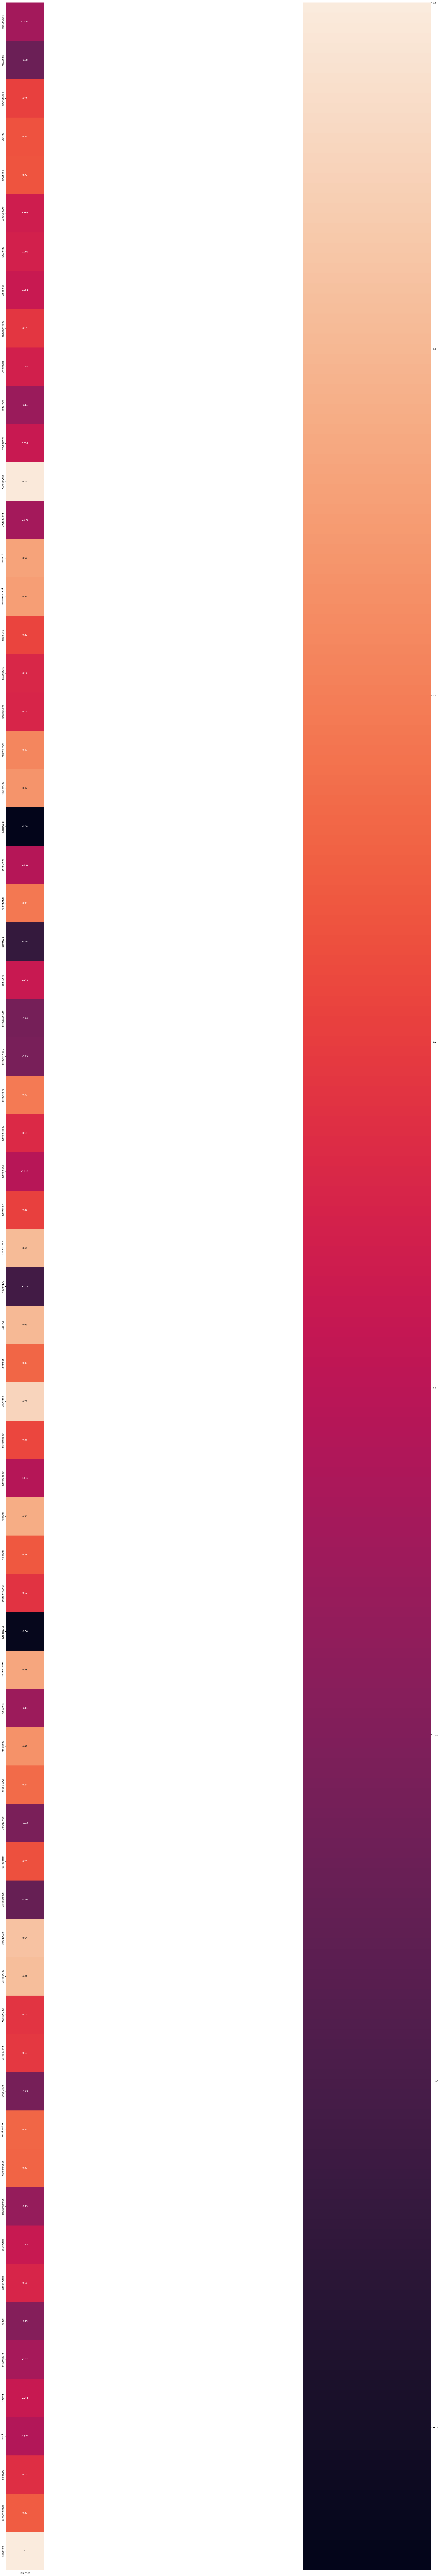

In [13]:
corrmat = df_train_dum.corr()
corr_saleprice = corrmat['SalePrice']
f, ax = plt.subplots(figsize=(400,200))
sns.heatmap(corr_saleprice.to_frame(), vmax=.8, square=True, annot=True)

In [14]:
X_tst.shape

(1459, 66)

In [15]:
X_trn.shape

(1460, 66)

In [ ]:
X_trn.isnull().sum().sort_values(ascending = False)[0:20]

In [9]:
set(X_trn.columns).difference(X_tst.columns)

set()

In [ ]:
type(set(X_tst.columns).difference(X_trn.columns))

set

In [16]:
print(X_trn.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1460, 66) (1460,)
(1169, 66) (1169,)
(145, 66) (145,)
(146, 66) (146,)


In [17]:
m_tree = DecisionTreeRegressor(max_depth=15, min_samples_split=54)
m_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_split=54)

In [18]:
y_pred = m_tree.predict(X_val)

In [19]:
mean_squared_error(np.log(np.where(y_pred<0, np.mean(y_train), y_pred)), np.log(y_val), squared = False)
#mean_squared_error(np.log(y_pred), np.log(y_val), squared = False)

0.19299475600793187

In [20]:
m_lr = LinearRegression()
m_lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred_lr = m_lr.predict(X_val)

In [22]:
print(mean_squared_error(np.log(np.where(y_pred_lr<0, np.mean(y_train), y_pred_lr)), np.log(y_val), squared = False))

score = m_lr.score(X_train, y_train)
print(score)


0.1870297247659319
0.8692641673038091


In [23]:
m_Ridge = Ridge(alpha=0.1)
m_Ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [24]:
y_pred_Ridge = m_Ridge.predict(X_val)

In [25]:
mean_squared_error(np.log(np.where(y_pred_Ridge<0, np.mean(y_train), y_pred_Ridge)), np.log(y_val), squared = False)

0.18702518689034942

In [26]:
m_GBR = GradientBoostingRegressor(warm_start=True, max_depth=2, min_samples_split=54, n_estimators=1000, learning_rate=0.1, max_features='sqrt', loss='huber', random_state=42)
m_GBR.fit(X_train,y_train)

GradientBoostingRegressor(loss='huber', max_depth=2, max_features='sqrt',
                          min_samples_split=54, n_estimators=1000,
                          random_state=42, warm_start=True)

In [27]:
y_pred_GBR = m_GBR.predict(X_val)

In [28]:
mean_squared_error(np.log(np.where(y_pred_GBR<0, np.mean(y_train), y_pred_GBR)), np.log(y_val), squared = False)

0.13706286133470047

export na kaggle

In [23]:
df_test.shape

(1459, 80)

In [ ]:
# LinearRegression
new_submission = df_test[['Id']]
y_pred_kaggle = m_lr.predict(X_tst)
new_submission['SalePrice'] = y_pred_kaggle
new_submission.to_csv("LinearRegression.csv", index = False)

In [ ]:
# DecisionTreeRegressor
new_submission = df_test[['Id']]
y_pred_kaggle = m_tree.predict(X_tst)
new_submission['SalePrice'] = y_pred_kaggle
new_submission.to_csv("DecisionTreeRegressor.csv", index = False)

In [ ]:
# SGDClassifier
new_submission = df_test[['Id']]
y_pred_kaggle = m_SGDClassifier.predict(X_tst)
new_submission['SalePrice'] = y_pred_kaggle
new_submission.to_csv("SGDClassifier.csv", index = False)

In [166]:
# GradientBoostingRegressor
new_submission = df_test[['Id']]
y_pred_kaggle = m_GBR.predict(X_tst)
new_submission['SalePrice'] = y_pred_kaggle
new_submission.to_csv("GradientBoostingRegressor.csv", index = False)

C:\Users\maro-personal\AppData\Local\Temp\ipykernel_13156\512699447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_submission['SalePrice'] = y_pred_kaggle
